Based on the use of the Fitness, predict the number of visitors to the Fitness, taking into account the influence of 
1.    Seasons
2.    Holidays
3.    The day of the week
4.    Gender
5.    Educational institution (Hanze vs. UG)
6.    Exam periods for the UG students.

# Install Library

In [221]:
#%pip install pandas matplotlib seaborn

# Read CSV files

In [222]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
#cardholders
cardholderPath = r"./Cardholders" 

#get all CSV files in the folder
cardholderCSV = glob.glob(os.path.join(cardholderPath, "*.csv"))

#create empty list
dfs = []

# loop over the list of csv files
for f in cardholderCSV:

#	#read the csv file
	df = pd.read_csv(f)
	print(df.shape[0])
	dfs.append(df)

print(dfs)

#concat all csv into one dataframe
cardholderDF = pd.concat(dfs)
cardholderDF.columns = ["Client ID", "Male", "Female", "Card Type"]

# print the content
print('Cardholders:')
display(cardholderDF.head())
print(cardholderDF.info())
print(cardholderDF.describe())


1371
984
13952
16523
[      Klant nr Geslacht Man Geslacht vrouw            Omschrijving
0       226676          NaN          Vrouw  Fitness Card 2021/2022
1       228069          NaN          Vrouw  Fitness Card 2021/2022
2       227923          Man            NaN  Fitness Card 2021/2022
3       227950          NaN          Vrouw  Fitness Card 2021/2022
4       228116          Man            NaN  Fitness Card 2021/2022
...        ...          ...            ...                     ...
1366    231111          Man            NaN  Fitness Card 2021/2022
1367    234974          Man            NaN  Fitness Card 2021/2022
1368    232465          NaN          Vrouw  Fitness Card 2021/2022
1369    235592          Man            NaN  Fitness Card 2021/2022
1370    235449          Man            NaN  Fitness Card 2021/2022

[1371 rows x 4 columns],      Klant nr Geslacht Man Geslacht vrouw            Omschrijving
0      220826          Man            NaN  Fitness Card 2020-2021
1      214958   

,Client ID,Male,Female,Card Type
0,226676,NaN,Vrouw,Fitness Card 2021/2022
1,228069,NaN,Vrouw,Fitness Card 2021/2022
2,227923,Man,NaN,Fitness Card 2021/2022
3,227950,NaN,Vrouw,Fitness Card 2021/2022
4,228116,Man,NaN,Fitness Card 2021/2022


<class 'pandas.core.frame.DataFrame'>
Index: 32830 entries, 0 to 16522
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Client ID  32830 non-null  int64 
 1   Male       14903 non-null  object
 2   Female     17119 non-null  object
 3   Card Type  32830 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB
None
           Client ID
count   32830.000000
mean   212305.477490
std     19069.354786
min     11117.000000
25%    203387.000000
50%    217945.000000
75%    225501.000000
max    235614.000000


In [224]:
#checkin times
checkinPath = r"./Check-in times"

#get all CSV files in the folder
checkinCSV = glob.glob(os.path.join(checkinPath, "*.csv"))

#create empty list
dfs = []

#loop over the list of csv files
for f in checkinCSV:

	#read the csv file
	df = pd.read_csv(f)
	#print(df.shape[0])
	dfs.append(df)

#concat all csv into one dataframe
checkinDF = pd.concat(dfs, ignore_index=True)

#print the content
print('Checkin Times:')
display(checkinDF.head())

#merge two Lid id together
print(checkinDF.info())
checkinDF.columns = ["Client ID", "Institution", "Gender", "Card Type", "Checkin Time", "Extra"]
checkinDF["Institution"] = checkinDF["Institution"].fillna(checkinDF["Extra"])
checkinDF.drop(["Extra"], axis=1, inplace=True)
checkinDF.reset_index(drop=True)

#print the content
print('After Removing Duplicated Columns:')
display(checkinDF.head())
print(checkinDF.info())
print(checkinDF.describe())

Checkin Times:


,Klant nr,Lid id,Geslacht,Abo bezoek,Incheckdatum,Lid id
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10,NaN
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,NaN
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,NaN
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,NaN
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Klant nr      380785 non-null  int64 
 1   Lid id        102827 non-null  object
 2   Geslacht      380785 non-null  object
 3   Abo bezoek    373011 non-null  object
 4   Incheckdatum  380785 non-null  object
 5   Lid id        253005 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.4+ MB
None
After Removing Duplicated Columns:


,Client ID,Institution,Gender,Card Type,Checkin Time
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Client ID     380785 non-null  int64 
 1   Institution   355832 non-null  object
 2   Gender        380785 non-null  object
 3   Card Type     373011 non-null  object
 4   Checkin Time  380785 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.5+ MB
None
           Client ID
count  380785.000000
mean   191590.238121
std     28360.215007
min        26.000000
25%    183541.000000
50%    196651.000000
75%    207474.000000
max    235293.000000


# EDA

## Card Holders

### Distribution by Gender

In [225]:
#gender
display(cardholderDF.head())

#combine gender column
cardholderDF["Male"] = cardholderDF["Male"].fillna(cardholderDF["Female"])
display(cardholderDF.head())

,Client ID,Male,Female,Card Type
0,226676,NaN,Vrouw,Fitness Card 2021/2022
1,228069,NaN,Vrouw,Fitness Card 2021/2022
2,227923,Man,NaN,Fitness Card 2021/2022
3,227950,NaN,Vrouw,Fitness Card 2021/2022
4,228116,Man,NaN,Fitness Card 2021/2022


,Client ID,Male,Female,Card Type
0,226676,Vrouw,Vrouw,Fitness Card 2021/2022
1,228069,Vrouw,Vrouw,Fitness Card 2021/2022
2,227923,Man,NaN,Fitness Card 2021/2022
3,227950,Vrouw,Vrouw,Fitness Card 2021/2022
4,228116,Man,NaN,Fitness Card 2021/2022


In [226]:
#remove extra column
cardholderDF.drop(["Female"], axis=1, inplace=True)

In [227]:
cardholderDF = cardholderDF.rename(columns={"Male": "Gender"}).reset_index(drop=True)
display(cardholderDF.head())
print(cardholderDF["Gender"].value_counts())

,Client ID,Gender,Card Type
0,226676,Vrouw,Fitness Card 2021/2022
1,228069,Vrouw,Fitness Card 2021/2022
2,227923,Man,Fitness Card 2021/2022
3,227950,Vrouw,Fitness Card 2021/2022
4,228116,Man,Fitness Card 2021/2022


Gender
Vrouw    17119
Man      14903
Name: count, dtype: int64


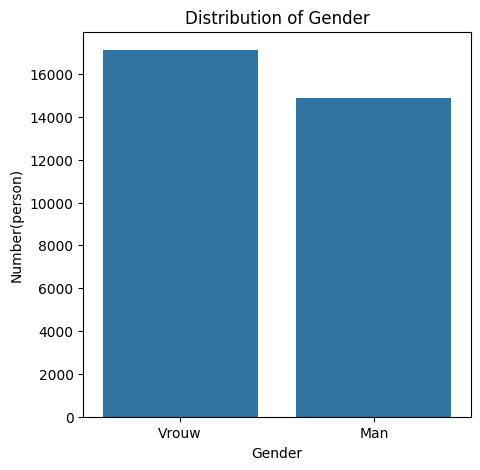

In [228]:
#Plot
plt.figure(figsize=(5,5))
Gender = sns.countplot(data = cardholderDF, x = "Gender")
Gender.set_title("Distribution of Gender")
Gender.set_xlabel("Gender")
Gender.set_ylabel("Number(person)")


plt.show()

### Districution by type of card

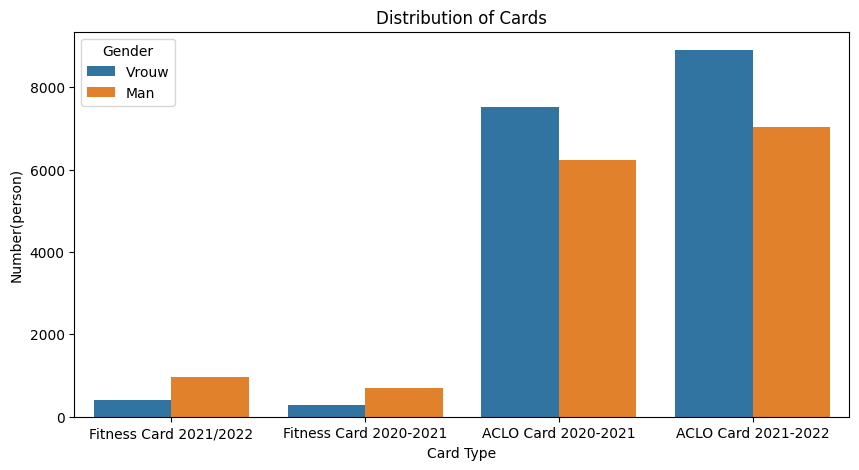

In [229]:
#type of cards
plt.figure(figsize=(10,5))
CardYear = sns.countplot(data = cardholderDF, x = "Card Type", hue = "Gender")
CardYear.set_title("Distribution of Cards")
CardYear.set_xlabel("Card Type")
CardYear.set_ylabel("Number(person)")

plt.show()

## Check In Times

### Fitness Usage by Education Institute

In [230]:
#check in times by education institute
print(checkinDF["Institution"].unique())

['Medewerker RUG      ' 'RUG       ' nan 'Hanze       ' 'Hanze      '
 '         ' ' ' 'GORM' 'CRUGET' '     ' 'WIWI' 'GEEJ' '       ' 'ETGE'
 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' '   ' 'WITF' '  ' '      ' 'JEVA'
 'VALE' 'UIWI' 'VWIL' 'Hanze ' '    ' 'DUJMedewerker RUG' 'KAJA'
 'RUGCHanzeHanze' 'MEAD' '        ' 'RORA' 'Medewerker RUGARN' 'JEEU'
 'Medewerker RUG/Hanze        ' 'Medewerker RUG/Hanze          '
 'Medewerker RUG/Hanze           ' 'RUG           '
 'Medewerker RUG/Hanze       ' 'RUG             ' 'Hanze            '
 'RUG          ' 'RUG            ' 'Medewerker RUG/Hanze         '
 'Hanze              ' 'Hanze        ' 'Hanze             '
 'Hanze                ' 'Hanze         ' 'Hanze               '
 'Medewerker RUG/Hanze             ' 'RUG              '
 'Hanze           ' 'Hanze          ' 'RUG                '
 'RUG               ' 'Medewerker RUG/Hanze              '
 'Medewerker RUG/Hanze            ' 'RUG                 ' 'RUG         '
 'RUG        ' 'Han

In [231]:
#clean data
checkinDF["Institution"] = checkinDF["Institution"].str.strip()
checkinDF["Institution"].dropna(inplace = True)
print(checkinDF["Institution"].unique())

['Medewerker RUG' 'RUG' nan 'Hanze' '' 'GORM' 'CRUGET' 'WIWI' 'GEEJ'
 'ETGE' 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' 'WITF' 'JEVA' 'VALE'
 'UIWI' 'VWIL' 'DUJMedewerker RUG' 'KAJA' 'RUGCHanzeHanze' 'MEAD' 'RORA'
 'Medewerker RUGARN' 'JEEU' 'Medewerker RUG/Hanze'
 'MedewerkerRUG RUG/HanzeanzeARN' 'DUJMedewerkerRUG RUG/Hanzeanze' 'BNAN'
 'KILI' 'JENRUG' 'BONI' 'HanzeOHanzeO' 'VEHanzeW' 'VRJO' 'RUGAL_dili'
 'MORN' 'A.KoRUGter@rug.nl' 'TARI' 'Medewerkers RUG/Hanze'
 '- -        :  :' '-  -        :  :' 'DUJMedewerkers RUG/Hanze'
 '-1-1 00  00:00:00' 'Medewerkers RUG/HanzeARN' 'WACHanze'
 '-1-1900  00:00:00' 'KLEB' 'AJAA' 'RUGMEL' 'KRJN'
 'Medewerkers RUG/HanzeRWB' 'waya' 'DARA' 'CAWO'
 'ROBMedewerkers RUG/Hanze' 'KLMO' 'DUJMedewerker RUG/Hanze' 'LEFI'
 'HanzeEMC' 'MEJJ' 'NAAU' 'Medewerker RUG/Hanze OOM'
 'Medewerker RUG/Hanze ELO' 'BORUGI' 'HanzeELE' 'ROBMedewerker RUG/Hanze'
 'KAFA' '-  -2       :  :' 'Medewerker RUG/Hanze ARN' 'WERUGW']


After confirming with the instructor, Data with values like MOOM, AJAA are actually the teacher's IDs from the schools. Hence, I decided to catogorize these data as "Medewerkers RUG/Hanze"

In [232]:
#remove unnecessary and find out all workers
wrongMask = ~checkinDF["Institution"].str.contains("_|-|@", na=False)
workerMask = (~checkinDF["Institution"].isin(["RUG", "Hanze"])) & (
    (checkinDF["Institution"].str.len() == 4) | (checkinDF["Institution"].str.contains("Medewerker|Hanze|RUG"))
)

checkinDF = checkinDF[wrongMask]

workerDF = checkinDF[workerMask]

instituteCount = workerDF["Institution"].value_counts()
print(instituteCount.to_string())

Institution
Medewerker RUG/Hanze              14848
Medewerker RUG                     9552
Medewerkers RUG/Hanze              9095
WIWI                                337
VWIL                                286
BONI                                231
ETGE                                217
GEEJ                                190
UIWI                                171
WITF                                164
RORA                                140
MEAD                                133
MORN                                 81
OLTI                                 63
DUJMedewerkers RUG/Hanze             60
DUJMedewerker RUG/Hanze              59
DROK                                 54
KILI                                 52
LEFI                                 47
HanzeEMC                             44
Medewerkers RUG/HanzeARN             43
CAWO                                 42
WACHanze                             37
KRJN                                 37
DUJMedewerker RUG           

/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/498272078.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  workerDF = checkinDF[workerMask]


In [233]:
#make all workers into category Medewerker
checkinDF.loc[workerMask, "Institution"] = "Medewerker RUG/Hanze"
print(checkinDF["Institution"].unique())
print(checkinDF["Institution"].value_counts())

['Medewerker RUG/Hanze' 'RUG' nan 'Hanze' '']
Institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
                          6431
Name: count, dtype: int64


In [234]:
#remove the annoying ''
checkinDF["Institution"].replace('', np.nan, inplace = True)
checkinDF["Institution"].dropna(inplace = True)
print(checkinDF["Institution"].value_counts())

Institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
Name: count, dtype: int64


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/648076230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  checkinDF["Institution"].replace('', np.nan, inplace = True)


In [235]:
probInstitute = checkinDF["Institution"].value_counts() / checkinDF["Institution"].value_counts().sum() * 100
probInstitute = pd.DataFrame(probInstitute)
probInstitute.columns = ["Prob"]
print(probInstitute)

                           Prob
Institution                    
RUG                   65.135436
Hanze                 24.353981
Medewerker RUG/Hanze  10.510583


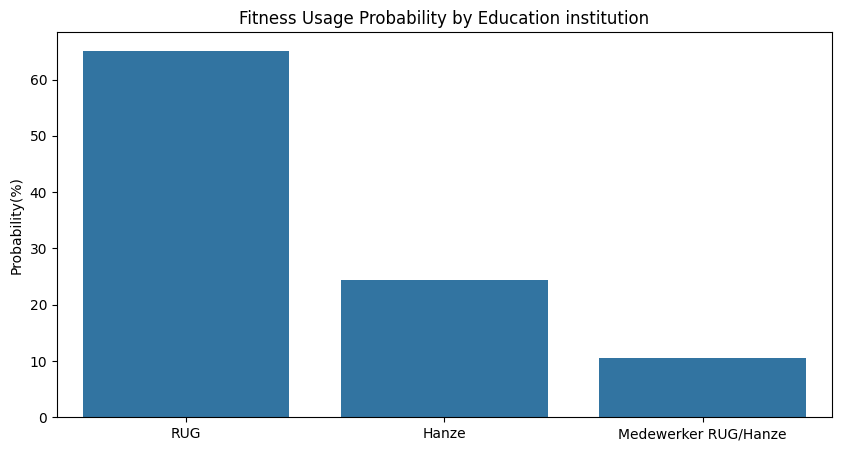

In [236]:
#Among all fitness usage history, the usage probability by education institution
plt.figure(figsize=(10,5))
Institutions = sns.barplot(data = probInstitute, x = probInstitute.index, y = "Prob")
Institutions.set_title("Fitness Usage Probability by Education institution")
Institutions.set_xlabel("")
Institutions.set_ylabel("Probability(%)")

plt.show()

### Fitness Usage by Gender

In [254]:
#check in times by gender

#remove fout(error) data
print(checkinDF["Gender"].value_counts())
foutMask = checkinDF["Gender"] == "fout"
checkinDF = checkinDF[~foutMask]  

print(f"After cleaning:{checkinDF['Gender'].value_counts()}")

Gender
M       278983
V        82478
fout     16507
Name: count, dtype: int64
After cleaning:Gender
M    278983
V     82478
Name: count, dtype: int64


In [255]:
probGender = pd.DataFrame(checkinDF["Gender"].value_counts() / checkinDF["Gender"].value_counts().sum() * 100)
probGender.columns = ["Prob"]
display(probGender)

,Prob
Gender,
M,77.182047
V,22.817953


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/1601965120.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cGender.set_xticklabels(genderType)


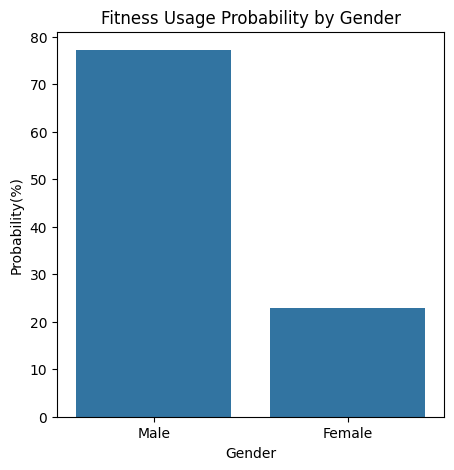

In [256]:
#among all fitness usage history, the usage probability by gender
plt.figure(figsize=(5,5))
cGender = sns.barplot(data = probGender, x = probGender.index, y = "Prob")
cGender.set_title("Fitness Usage Probability by Gender")
cGender.set_xlabel("Gender")
cGender.set_ylabel("Probability(%)")

genderType = ["Male", "Female"]
cGender.set_xticklabels(genderType)

plt.show()

In [ ]:
#among all fitness usage history, the usage probability by gender of each institution
probEduGender = checkinDF.groupby(["Institution", "Gender"]).size().reset_index(name = "Frequency")
probEduGender["Prob"] = probEduGender["Frequency"] / probEduGender["Frequency"].sum() * 100
display(probEduGender)

,Institution,Gender,Frequency,Prob
0,Hanze,M,62627,18.069790
1,Hanze,V,16390,4.729012
2,Hanze,fout,5390,1.555179
3,Medewerker RUG/Hanze,M,30208,8.715925
4,Medewerker RUG/Hanze,V,5861,1.691076
5,Medewerker RUG/Hanze,fout,359,0.103582
6,RUG,M,174029,50.212647
7,RUG,V,45499,13.127842
8,RUG,fout,6221,1.794947


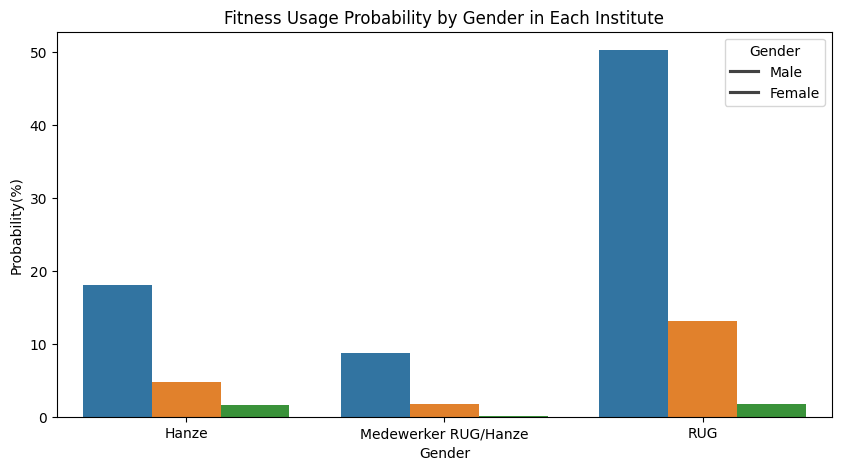

In [ ]:
plt.figure(figsize=(10,5))
cEduGender = sns.barplot(data = probEduGender, x = "Institution", y = "Prob", hue = "Gender")
cEduGender.set_title("Fitness Usage Probability by Gender in Each Institute")
cEduGender.set_xlabel("Gender")
cEduGender.set_ylabel("Probability(%)")
cEduGender.legend(title = "Gender", labels = ["Male", "Female"])

plt.show()

### Fitness Usage by Card Type

As the previous Card Type distribution indicates, most people hold a regular card. 
It will be normal that the frequency of Regular Card is higher.

Hence, I decided to do normalization with the data.

In [ ]:
numCard = checkinDF.groupby("Card Type").size().reset_index(name = "Frequency")
display(numCard)

,Card Type,Frequency
0,ACLO 1st semester Card 2021/2022,364
1,ACLO Card 2021-2022,3305
2,ACLO free Card 2021/2022,45
3,Fitness 'krachtwacht' 2018-2019,1737
4,Fitness 1st semester 2020-2021,1100
5,Fitness 1st semester 2021/2022,1761
6,Fitness 1st semester Card 18-19,4401
7,Fitness 1st semester Card 19-20,7582
8,Fitness 2nd semester 2020-2021,17
9,Fitness 2nd semester Card 18-19,12254


In [ ]:
#fitness usage by each card type
numCard = numCard[numCard["Card Type"].str.contains("ACLO Card|Fitness Card")]
display(numCard)

,Card Type,Frequency
1,ACLO Card 2021-2022,3305
11,Fitness Card 2016-2017,3124
12,Fitness Card 2017-2018,86417
13,Fitness Card 2018-2019,78113
14,Fitness Card 2019-2020,68198
15,Fitness Card 2020-2021,14423
16,Fitness Card 2021/2022,11487


In [ ]:
#number of unique member for fitness usage by each card type
numMemberCard = checkinDF.groupby("Card Type")["Client ID"].nunique().reset_index(name = "Unique")
numMemberCard = numMemberCard[numMemberCard["Card Type"].str.contains("ACLO Card|Fitness Card")]

display(numMemberCard)

,Card Type,Unique
1,ACLO Card 2021-2022,911
11,Fitness Card 2016-2017,479
12,Fitness Card 2017-2018,1685
13,Fitness Card 2018-2019,1677
14,Fitness Card 2019-2020,1696
15,Fitness Card 2020-2021,827
16,Fitness Card 2021/2022,1108


In [ ]:
#total amount of card distributed
memberCard = cardholderDF.groupby("Card Type").size().reset_index(name = "Distribute")
display(memberCard)

,Card Type,Distribute
0,ACLO Card 2020-2021,13952
1,ACLO Card 2021-2022,16523
2,Fitness Card 2020-2021,984
3,Fitness Card 2021/2022,1371


In [ ]:
numAllCard = memberCard.merge(numCard, how = "outer", on = "Card Type")
numAllCard = numAllCard.merge(numMemberCard, how = "outer", on = "Card Type")
numAllCard = numAllCard.fillna(0)

numAllCard["perMemberUsage"] = numAllCard["Frequency"] / numAllCard["Unique"]
numAllCard["fitnessUser"] = numAllCard.loc[numAllCard["Distribute"] > 0, "Unique"] / numAllCard["Distribute"] * 100
display(numAllCard)

,Card Type,Distribute,Frequency,Unique,perMemberUsage,fitnessUser
0,ACLO Card 2020-2021,13952.0,0.0,0.0,NaN,0.000000
1,ACLO Card 2021-2022,16523.0,3305.0,911.0,3.627881,5.513527
2,Fitness Card 2016-2017,0.0,3124.0,479.0,6.521921,NaN
3,Fitness Card 2017-2018,0.0,86417.0,1685.0,51.286053,NaN
4,Fitness Card 2018-2019,0.0,78113.0,1677.0,46.579010,NaN
5,Fitness Card 2019-2020,0.0,68198.0,1696.0,40.211085,NaN
6,Fitness Card 2020-2021,984.0,14423.0,827.0,17.440145,84.044715
7,Fitness Card 2021/2022,1371.0,11487.0,1108.0,10.367329,80.816922


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/949258675.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cCard.set_xticklabels(labels = cCard.get_xticklabels(), rotation = 45, ha = "right")


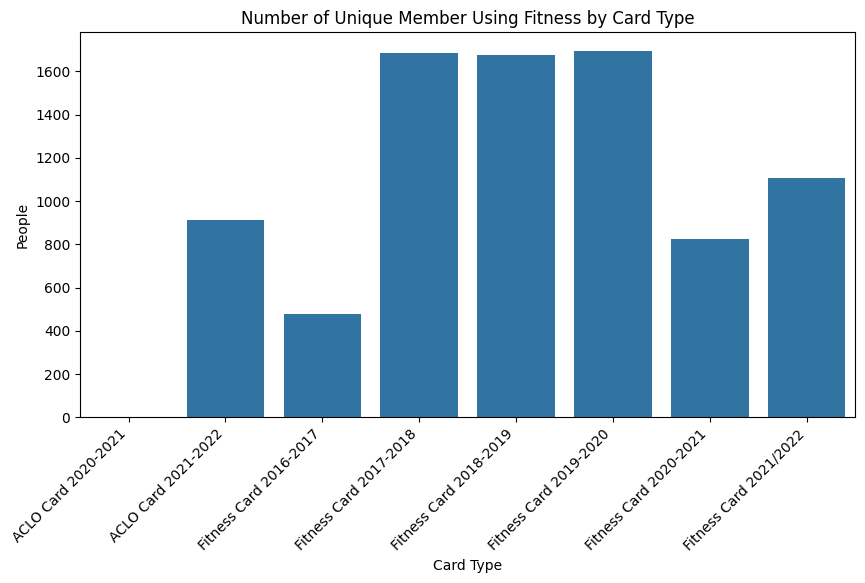

In [ ]:
#among all card type, the number of unique member using fitness
plt.figure(figsize=(10,5))
cCard = sns.barplot(data = numAllCard, x = "Card Type", y = "Unique")
cCard.set_title("Number of Unique Member Using Fitness by Card Type")
cCard.set_xlabel("Card Type")
cCard.set_ylabel("People")
cCard.set_xticklabels(labels = cCard.get_xticklabels(), rotation = 45, ha = "right")


plt.show()

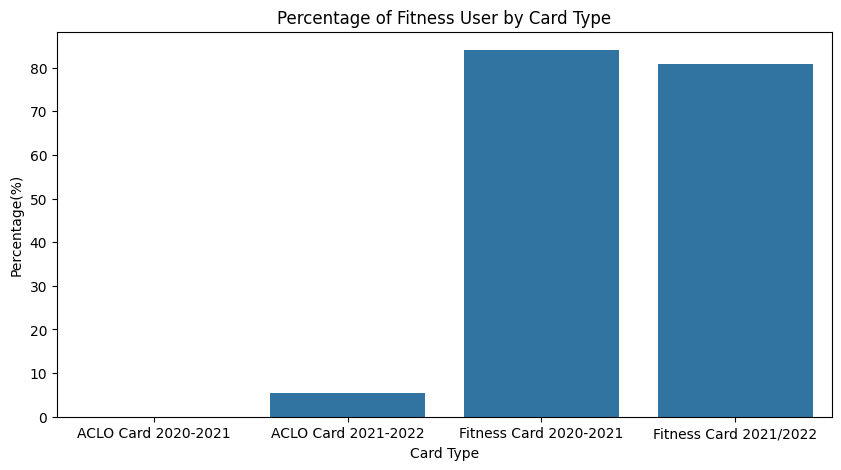

In [ ]:
#among all card type, the fitness usage probability
plt.figure(figsize=(10,5))
cCard = sns.barplot(data = numAllCard[~numAllCard["fitnessUser"].isna()], x = "Card Type", y = "fitnessUser")
cCard.set_title("Percentage of Fitness User by Card Type")
cCard.set_xlabel("Card Type")
cCard.set_ylabel("Percentage(%)")


plt.show()

/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/2059599336.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cCard.set_xticklabels(labels = cCard.get_xticklabels(), rotation = 45, ha = "right")


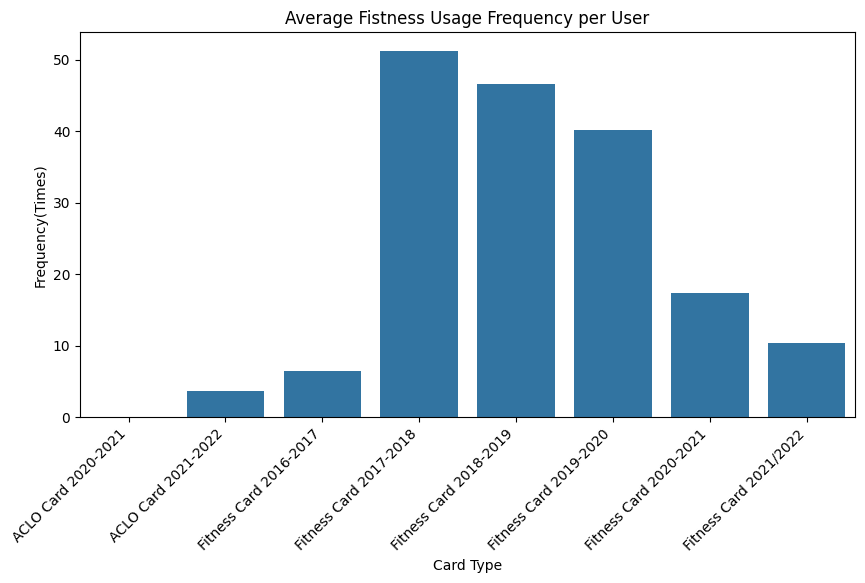

In [ ]:
#among all card type, the average fitness usage frequency per user
plt.figure(figsize=(10,5))
cCard = sns.barplot(data = numAllCard, x = "Card Type", y = "perMemberUsage")
cCard.set_title("Average Fistness Usage Frequency per User")
cCard.set_xlabel("Card Type")
cCard.set_ylabel("Frequency(Times)")
cCard.set_xticklabels(labels = cCard.get_xticklabels(), rotation = 45, ha = "right")


plt.show()

### Fitness Usage by Card Types and Education Institute

In [ ]:
#among each card users from all school, the number of unique fitness users
numEduCard = checkinDF[checkinDF["Card Type"].str.contains("ACLO Card|Fitness Card", na = False)].\
    groupby(["Institution", "Card Type"])["Client ID"].nunique().reset_index(name = "Unique")

display(numEduCard)

,Institution,Card Type,Unique
0,Hanze,ACLO Card 2021-2022,224
1,Hanze,Fitness Card 2016-2017,85
2,Hanze,Fitness Card 2017-2018,364
3,Hanze,Fitness Card 2018-2019,394
4,Hanze,Fitness Card 2019-2020,451
5,Hanze,Fitness Card 2020-2021,214
6,Hanze,Fitness Card 2021/2022,311
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,88
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,21


In [ ]:
eduTotal = numEduCard.groupby("Card Type")["Unique"].transform("sum")

numEduCard["Prob"] = numEduCard["Unique"] / eduTotal * 100
display(numEduCard)

,Institution,Card Type,Unique,Prob
0,Hanze,ACLO Card 2021-2022,224,24.888889
1,Hanze,Fitness Card 2016-2017,85,19.406393
2,Hanze,Fitness Card 2017-2018,364,22.764228
3,Hanze,Fitness Card 2018-2019,394,24.578915
4,Hanze,Fitness Card 2019-2020,451,26.765579
5,Hanze,Fitness Card 2020-2021,214,26.002430
6,Hanze,Fitness Card 2021/2022,311,28.401826
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,88,20.091324
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,165,10.318949
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,21,1.310044


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/856773988.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


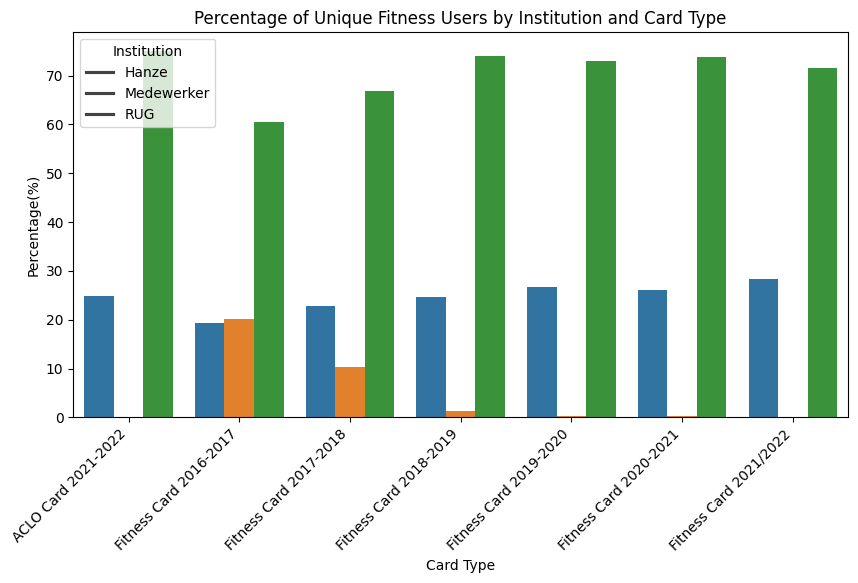

In [ ]:
#plot
plt.figure(figsize=(10,5))
holiday = sns.barplot(data = numEduCard, x="Card Type", y="Prob", hue="Institution")
holiday.set_title("Percentage of Unique Fitness Users by Institution and Card Type")
holiday.set_xlabel("Card Type")
holiday.set_ylabel("Percentage(%)")
holiday.legend(title = "Institution", labels = ["Hanze", "Medewerker", "RUG"])
holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


plt.show()

In [ ]:
#among each card users from all school, the frequency of fitness usage
freEduCard = checkinDF[checkinDF["Card Type"].str.contains("ACLO Card|Fitness Card", na = False)].\
    groupby(["Institution", "Card Type"])["Client ID"].size().reset_index(name = "Frequency")

display(freEduCard)

,Institution,Card Type,Frequency
0,Hanze,ACLO Card 2021-2022,810
1,Hanze,Fitness Card 2016-2017,659
2,Hanze,Fitness Card 2017-2018,20031
3,Hanze,Fitness Card 2018-2019,18063
4,Hanze,Fitness Card 2019-2020,17767
5,Hanze,Fitness Card 2020-2021,3600
6,Hanze,Fitness Card 2021/2022,2868
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,634
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,7915
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,1108


In [ ]:
eduTotalFre = freEduCard.groupby("Card Type")["Frequency"].transform("sum")

freEduCard["Prob"] = freEduCard["Frequency"] / eduTotalFre * 100
display(freEduCard)

,Institution,Card Type,Frequency,Prob
0,Hanze,ACLO Card 2021-2022,810,24.680073
1,Hanze,Fitness Card 2016-2017,659,23.385380
2,Hanze,Fitness Card 2017-2018,20031,24.397106
3,Hanze,Fitness Card 2018-2019,18063,24.177486
4,Hanze,Fitness Card 2019-2020,17767,26.218163
5,Hanze,Fitness Card 2020-2021,3600,25.003473
6,Hanze,Fitness Card 2021/2022,2868,25.096255
7,Medewerker RUG/Hanze,Fitness Card 2016-2017,634,22.498226
8,Medewerker RUG/Hanze,Fitness Card 2017-2018,7915,9.640212
9,Medewerker RUG/Hanze,Fitness Card 2018-2019,1108,1.483068


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/1211152529.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


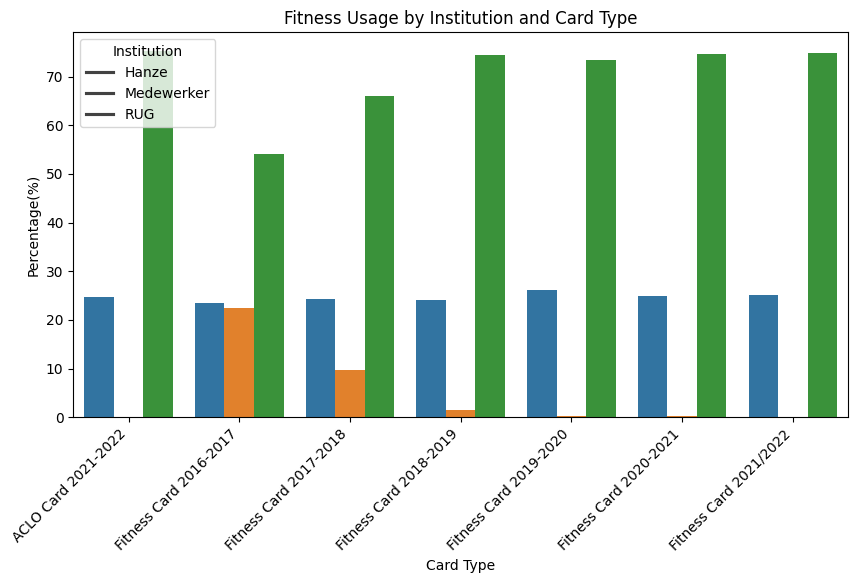

In [ ]:
#plot
plt.figure(figsize=(10,5))
holiday = sns.barplot(data = freEduCard, x="Card Type", y="Prob", hue="Institution")
holiday.set_title("Fitness Usage by Institution and Card Type")
holiday.set_xlabel("Card Type")
holiday.set_ylabel("Percentage(%)")
holiday.legend(title = "Institution", labels = ["Hanze", "Medewerker", "RUG"])
holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


plt.show()

### Fitness Usage by Month

In [ ]:
#Check in times by month

print(type(checkinDF.loc[0, "Checkin Time"]))

<class 'str'>


In [ ]:
#make string time into datetime
checkinDF["Checkin Time"] = pd.to_datetime(checkinDF["Checkin Time"])

#fetch out year and month
checkinDF["Year"] = checkinDF["Checkin Time"].dt.year
checkinDF["Month"] = checkinDF["Checkin Time"].dt.month_name()

display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August


In [ ]:
#count frequency of month by each year
numMonth = checkinDF.groupby(['Year', 'Month']).size().reset_index(name='Frequency')
display(numMonth)

,Year,Month,Frequency
0,2017,August,4166
1,2017,December,7790
2,2017,November,10811
3,2017,October,12209
4,2017,September,8503
5,2018,April,10151
6,2018,August,2372
7,2018,December,8375
8,2018,February,11994
9,2018,January,9118


In [ ]:
#make month and year as the index and column of the table
monthPivot = numMonth.pivot_table(index='Month', columns='Year', values='Frequency', fill_value = 0, margins = True)
display(monthPivot)

Year,2017,2018,2019,2020,2021,All
Month,,,,,,
April,0.0,10151.000000,11440.000000,0.0,76.000000,7222.333333
August,4166.0,2372.000000,4468.000000,1572.0,2624.000000,3040.400000
December,7790.0,8375.000000,12726.000000,2330.0,177.000000,6279.600000
February,0.0,11994.000000,11992.000000,20853.0,0.000000,14946.333333
January,0.0,9118.000000,11504.000000,16563.0,0.000000,12395.000000
July,0.0,4374.000000,5086.000000,1299.0,2282.000000,3260.250000
June,0.0,9329.000000,10192.000000,8.0,4542.000000,6017.750000
March,0.0,12774.000000,13504.000000,8840.0,0.000000,11706.000000
May,0.0,10874.000000,13509.000000,0.0,1317.000000,8566.666667


In [ ]:
#make the table more readable

#sort index by custom month order
monthSort = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthPivot = monthPivot.reindex(monthSort)

display(monthPivot)

Year,2017,2018,2019,2020,2021,All
Month,,,,,,
January,0.0,9118.0,11504.0,16563.0,0.0,12395.000000
February,0.0,11994.0,11992.0,20853.0,0.0,14946.333333
March,0.0,12774.0,13504.0,8840.0,0.0,11706.000000
April,0.0,10151.0,11440.0,0.0,76.0,7222.333333
May,0.0,10874.0,13509.0,0.0,1317.0,8566.666667
June,0.0,9329.0,10192.0,8.0,4542.0,6017.750000
July,0.0,4374.0,5086.0,1299.0,2282.0,3260.250000
August,4166.0,2372.0,4468.0,1572.0,2624.0,3040.400000
September,8503.0,4172.0,11284.0,4724.0,5726.0,6881.800000


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/2430837729.py:5: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  CheckinMonth = sns.lineplot(data=monthPivot.drop(columns=['All']), markers="o", ax=ax1)


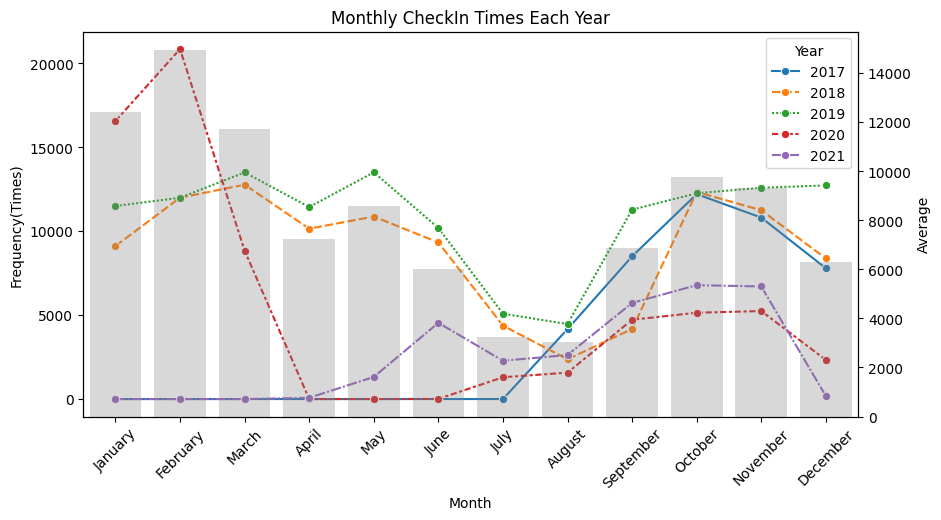

In [ ]:
#seperate monthly checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
CheckinMonth = sns.lineplot(data=monthPivot.drop(columns=['All']), markers="o", ax=ax1)
CheckinMonth.set_title("Monthly CheckIn Times Each Year")
CheckinMonth.set_xlabel("Month")
CheckinMonth.set_ylabel("Frequency(Times)")
CheckinMonth.set_xticks(range(len(monthSort))) # Ensure proper spacing for x-axis labels
CheckinMonth.set_xticklabels(monthSort, rotation=45) #increase readability
CheckinMonth.legend(title="Year")

#Barchart for average chackin
ax2 = ax1.twinx()
total = sns.barplot(x=monthPivot.index, y=monthPivot['All'], alpha=0.3, color='gray', ax=ax2)
total.set_ylabel("Average")

plt.show()

### Used Times by weekdays

In [ ]:
#Check in times by weekdays

#Fetch weekdays
checkinDF["Weekday"] = checkinDF["Checkin Time"].dt.day_name()

display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday


In [ ]:
#Count frequency of month by each year
numWeekDay = checkinDF.groupby(['Month', 'Weekday']).size().reset_index(name='Frequency')
display(numWeekDay)

,Month,Weekday,Frequency
0,April,Friday,2414
1,April,Monday,5095
2,April,Saturday,1513
3,April,Sunday,1656
4,April,Thursday,3139
...,...,...,...
79,September,Saturday,2900
80,September,Sunday,2605
81,September,Thursday,5475
82,September,Tuesday,6041


In [ ]:
#Make weekday and month as the index and column of the table
weekdayPivot = numWeekDay.pivot_table(index='Weekday', columns='Month', values='Frequency', fill_value = 0, margins = True)
display(weekdayPivot)

Month,April,August,December,February,January,July,June,March,May,November,October,September,All
Weekday,,,,,,,,,,,,,
Friday,2414.000000,2684.000000,4602.000000,6089.000000,5613.000000,2083.0,3566.000000,4631.000000,3695.000000,6652.000000,6440.000000,5066.000000,4461.250000
Monday,5095.000000,3371.000000,5856.000000,8524.000000,6624.000000,3009.0,3982.000000,7106.000000,4410.000000,8579.000000,9437.000000,6508.000000,6041.750000
Saturday,1513.000000,513.000000,2424.000000,3726.000000,3215.000000,517.0,2569.000000,2867.000000,1649.000000,3994.000000,4218.000000,2900.000000,2508.750000
Sunday,1656.000000,345.000000,2830.000000,3063.000000,3101.000000,446.0,2217.000000,2615.000000,1431.000000,3894.000000,3968.000000,2605.000000,2347.583333
Thursday,3139.000000,2798.000000,4841.000000,6747.000000,5772.000000,2173.0,3556.000000,5744.000000,4206.000000,7301.000000,7260.000000,5475.000000,4917.666667
Tuesday,4271.000000,2888.000000,5505.000000,8338.000000,6164.000000,2402.0,4160.000000,6023.000000,4722.000000,8031.000000,8921.000000,6041.000000,5622.166667
Wednesday,3579.000000,2603.000000,5340.000000,8352.000000,6696.000000,2411.0,4021.000000,6132.000000,5587.000000,8151.000000,8492.000000,5814.000000,5598.166667
All,3095.285714,2171.714286,4485.428571,6405.571429,5312.142857,1863.0,3438.714286,5016.857143,3671.428571,6657.428571,6962.285714,4915.571429,4499.619048


In [ ]:
#increase readability

#sort index and column by order
weekdaySort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdayPivot = weekdayPivot.reindex(index=weekdaySort, columns=monthSort)

display(weekdayPivot)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Weekday,,,,,,,,,,,,
Monday,6624.0,8524.0,7106.0,5095.0,4410.0,3982.0,3009.0,3371.0,6508.0,9437.0,8579.0,5856.0
Tuesday,6164.0,8338.0,6023.0,4271.0,4722.0,4160.0,2402.0,2888.0,6041.0,8921.0,8031.0,5505.0
Wednesday,6696.0,8352.0,6132.0,3579.0,5587.0,4021.0,2411.0,2603.0,5814.0,8492.0,8151.0,5340.0
Thursday,5772.0,6747.0,5744.0,3139.0,4206.0,3556.0,2173.0,2798.0,5475.0,7260.0,7301.0,4841.0
Friday,5613.0,6089.0,4631.0,2414.0,3695.0,3566.0,2083.0,2684.0,5066.0,6440.0,6652.0,4602.0
Saturday,3215.0,3726.0,2867.0,1513.0,1649.0,2569.0,517.0,513.0,2900.0,4218.0,3994.0,2424.0
Sunday,3101.0,3063.0,2615.0,1656.0,1431.0,2217.0,446.0,345.0,2605.0,3968.0,3894.0,2830.0


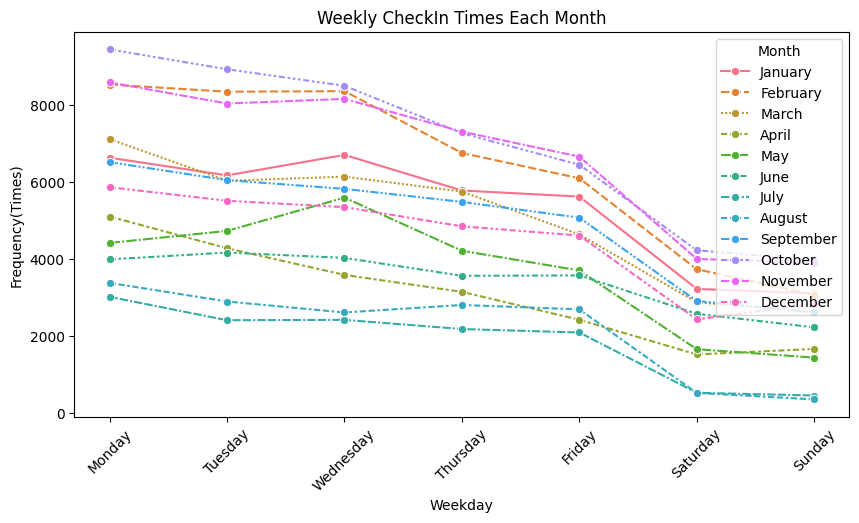

In [ ]:
#Plot
plt.figure(figsize=(10,5))
checkinMonth = sns.lineplot(data=weekdayPivot, marker="o")
checkinMonth.set_title("Weekly CheckIn Times Each Month")
checkinMonth.set_xlabel("Weekday")
checkinMonth.set_ylabel("Frequency(Times)")
plt.legend(title="Month")
plt.xticks(rotation=45) #increase readability


plt.show()

### Used TImes by Season

In [ ]:
#Check in times by season
def getSeason(month):
    if month in ("December", "January", "February"):
        return "Winter"
    elif month in ("March", "April", "May"):
        return "Spring"
    elif month in ("June", "July", "August"):
        return "Summer"
    else:
        return "Fall"

In [ ]:
checkinDF["Season"] = checkinDF["Month"].apply(getSeason)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer


In [ ]:
#group season by year
numSeason = checkinDF.groupby(['Year', 'Season']).size().reset_index(name='Frequency')
display(numSeason)

,Year,Season,Frequency
0,2017,Fall,31523
1,2017,Summer,4166
2,2017,Winter,7790
3,2018,Fall,27758
4,2018,Spring,33799
5,2018,Summer,16075
6,2018,Winter,29487
7,2019,Fall,36135
8,2019,Spring,38453
9,2019,Summer,19746


In [ ]:
#make season and year as the index and column of the table
seasonPivot = numSeason.pivot_table(index='Season', columns='Year', values='Frequency', fill_value = 0, margins = True)
display(seasonPivot)

Year,2017,2018,2019,2020,2021,All
Season,,,,,,
Fall,31523.0,27758.00,36135.0,15111.0,19220.0,25949.400000
Spring,0.0,33799.00,38453.0,8840.0,1393.0,20621.250000
Summer,4166.0,16075.00,19746.0,2879.0,9448.0,10462.800000
Winter,7790.0,29487.00,36222.0,39746.0,177.0,22684.400000
All,14493.0,26779.75,32639.0,16644.0,7559.5,19893.052632


In [ ]:
#increase readability

#sort index and column by order
seasonSort = ['Spring', 'Summer', 'Fall', 'Winter']
seasonPivot = seasonPivot.reindex(index=seasonSort)

display(seasonPivot)

Year,2017,2018,2019,2020,2021,All
Season,,,,,,
Spring,0.0,33799.0,38453.0,8840.0,1393.0,20621.25
Summer,4166.0,16075.0,19746.0,2879.0,9448.0,10462.80
Fall,31523.0,27758.0,36135.0,15111.0,19220.0,25949.40
Winter,7790.0,29487.0,36222.0,39746.0,177.0,22684.40


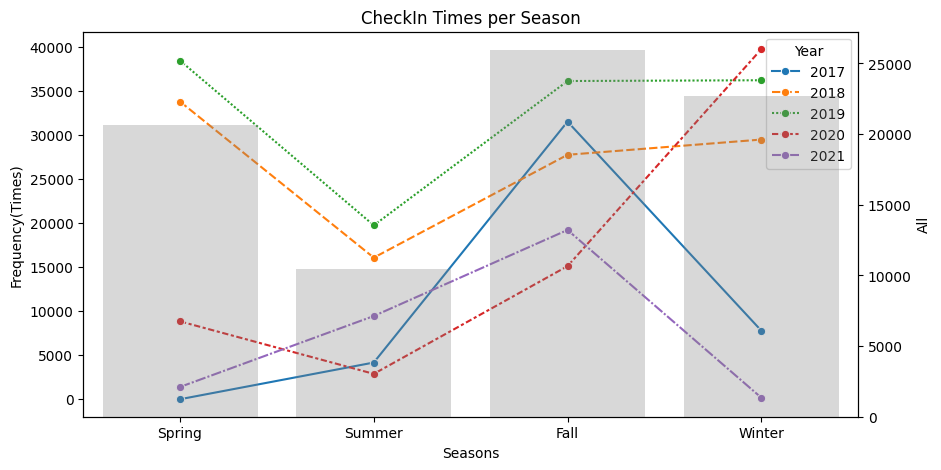

In [ ]:
#seperated yearly season checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
checkinSeason = sns.lineplot(data=seasonPivot.drop(columns=['All']), marker="o", ax=ax1)
checkinSeason.set_title("CheckIn Times per Season")
checkinSeason.set_xlabel("Seasons")
checkinSeason.set_ylabel("Frequency(Times)")
checkinSeason.legend(title="Year")

#Barchart for average checkin
ax2 = ax1.twinx()
sns.barplot(x=seasonPivot.index, y=seasonPivot['All'], alpha=0.3, color='gray', ax=ax2)

plt.show()

### Used Times during Holiday

Since Hanze calendar is not accessable before 2023, I use RUG's calendar as both the vacation period and exam period

In [ ]:
#check in time by holiday

#read calendar
calendar = pd.read_csv("./calendar.csv")
display(calendar.head())

,date,holiday,Exam,Lockdown
0,1/1/17,Christmas Break,0.0,0.0
1,1/2/17,Christmas Break,0.0,0.0
2,1/3/17,Christmas Break,0.0,0.0
3,1/4/17,Christmas Break,0.0,0.0
4,1/5/17,Christmas Break,0.0,0.0


In [ ]:
print(type(calendar.loc[0, "date"]))

<class 'str'>


In [ ]:
calendar["date"] = calendar["date"].apply(pd.to_datetime).apply(lambda x: x.date())
print(type(calendar.loc[0, "date"]))

<class 'datetime.date'>


In [ ]:
#set date as index
calendar = calendar.set_index("date")
display(calendar.head())

,holiday,Exam,Lockdown
date,,,
2017-01-01,Christmas Break,0.0,0.0
2017-01-02,Christmas Break,0.0,0.0
2017-01-03,Christmas Break,0.0,0.0
2017-01-04,Christmas Break,0.0,0.0
2017-01-05,Christmas Break,0.0,0.0


In [ ]:
print(calendar["holiday"].info())
print("="*20)
print(calendar["holiday"].size)
print("="*20)

numCalendar = calendar.groupby(["Lockdown", "holiday"]).size().reset_index(name='Frequency')
display(numCalendar)

<class 'pandas.core.series.Series'>
Index: 3695 entries, 2017-01-01 to NaT
Series name: holiday
Non-Null Count  Dtype 
--------------  ----- 
604 non-null    object
dtypes: object(1)
memory usage: 57.7+ KB
None
3695


,Lockdown,holiday,Frequency
0,0.0,Ascension Day,7
1,0.0,Christmas Break,86
2,0.0,Easter,20
3,0.0,Flexible Break,13
4,0.0,Kingsday,7
5,0.0,Liberation Day,7
6,0.0,Summer Vacation,326
7,0.0,Whit,12
8,1.0,Ascension Day,2
9,1.0,Christmas Break,26


In [ ]:
def getHoliday(datetime):
    date = datetime.date()
    return calendar.loc[date, "holiday"]

In [ ]:
#return holiday of the date, if not holiday then NaN
checkinDF["Holiday"] = checkinDF["Checkin Time"].apply(getHoliday)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season,Holiday
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation


In [ ]:
print(checkinDF["Holiday"].value_counts())

Holiday
Summer Vacation    20389
Christmas Break     4596
Flexible Break      2006
Easter              1132
Whit                 756
Ascension Day        512
Name: count, dtype: int64


In [ ]:
#add if it's during Covid lockdown
def getCovid(datetime):
    date = datetime.date()
    return calendar.loc[date, "Lockdown"]

In [ ]:
checkinDF["Covid"] = checkinDF["Checkin Time"].apply(getCovid)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season,Holiday,Covid
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0.0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0.0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0.0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0.0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0.0


In [ ]:
#groupby covid and holiday
numHoliday = checkinDF.groupby(["Covid", "Holiday"]).size().reset_index(name='Frequency')

display(numHoliday)

,Covid,Holiday,Frequency
0,0.0,Ascension Day,510
1,0.0,Christmas Break,4596
2,0.0,Easter,1129
3,0.0,Flexible Break,2006
4,0.0,Summer Vacation,15534
5,0.0,Whit,756
6,1.0,Ascension Day,2
7,1.0,Easter,3
8,1.0,Summer Vacation,4855


Since Summer Vacation got more days in a year, it's pretty normal that it has the highest frequency.
Hence I decided to normalize them

In [ ]:
numAllHoliday = numCalendar.merge(numHoliday, how = "left",\
                                  left_on = ["Lockdown", "holiday"], right_on = ["Covid", "Holiday"],\
                                    suffixes = ["_hol", "_check"])

display(numAllHoliday)

,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check
0,0.0,Ascension Day,7,0.0,Ascension Day,510.0
1,0.0,Christmas Break,86,0.0,Christmas Break,4596.0
2,0.0,Easter,20,0.0,Easter,1129.0
3,0.0,Flexible Break,13,0.0,Flexible Break,2006.0
4,0.0,Kingsday,7,NaN,NaN,NaN
5,0.0,Liberation Day,7,NaN,NaN,NaN
6,0.0,Summer Vacation,326,0.0,Summer Vacation,15534.0
7,0.0,Whit,12,0.0,Whit,756.0
8,1.0,Ascension Day,2,1.0,Ascension Day,2.0
9,1.0,Christmas Break,26,NaN,NaN,NaN


In [ ]:
numAllHoliday["Frequency_check"].fillna(0, inplace = True)
display(numAllHoliday)

/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/1044055377.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numAllHoliday["Frequency_check"].fillna(0, inplace = True)


,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check
0,0.0,Ascension Day,7,0.0,Ascension Day,510.0
1,0.0,Christmas Break,86,0.0,Christmas Break,4596.0
2,0.0,Easter,20,0.0,Easter,1129.0
3,0.0,Flexible Break,13,0.0,Flexible Break,2006.0
4,0.0,Kingsday,7,NaN,NaN,0.0
5,0.0,Liberation Day,7,NaN,NaN,0.0
6,0.0,Summer Vacation,326,0.0,Summer Vacation,15534.0
7,0.0,Whit,12,0.0,Whit,756.0
8,1.0,Ascension Day,2,1.0,Ascension Day,2.0
9,1.0,Christmas Break,26,NaN,NaN,0.0


In [ ]:
numAllHoliday["Normalized"] = numAllHoliday["Frequency_check"] / numAllHoliday["Frequency_hol"]
display(numAllHoliday)

,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check,Normalized
0,0.0,Ascension Day,7,0.0,Ascension Day,510.0,72.857143
1,0.0,Christmas Break,86,0.0,Christmas Break,4596.0,53.441860
2,0.0,Easter,20,0.0,Easter,1129.0,56.450000
3,0.0,Flexible Break,13,0.0,Flexible Break,2006.0,154.307692
4,0.0,Kingsday,7,NaN,NaN,0.0,0.000000
5,0.0,Liberation Day,7,NaN,NaN,0.0,0.000000
6,0.0,Summer Vacation,326,0.0,Summer Vacation,15534.0,47.650307
7,0.0,Whit,12,0.0,Whit,756.0,63.000000
8,1.0,Ascension Day,2,1.0,Ascension Day,2.0,1.000000
9,1.0,Christmas Break,26,NaN,NaN,0.0,0.000000


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/880302981.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


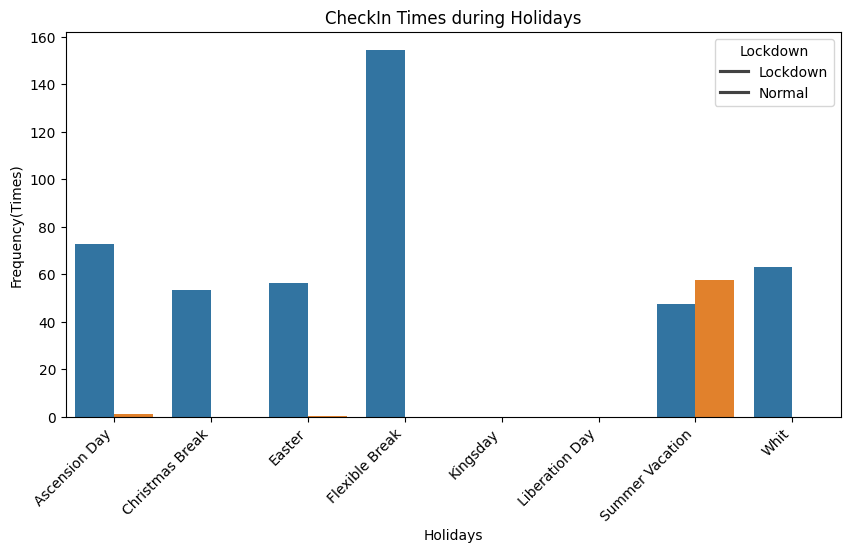

In [ ]:
#plot
plt.figure(figsize=(10,5))
holiday = sns.barplot(data = numAllHoliday, x="holiday", y="Normalized", hue="Lockdown")
holiday.set_title("CheckIn Times during Holidays")
holiday.set_xlabel("Holidays")
holiday.set_ylabel("Frequency(Times)")
holiday.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])
holiday.set_xticklabels(holiday.get_xticklabels(), rotation=45, ha = "right")


plt.show()

In [ ]:
#between holidays and non-holidays
holidayDF = checkinDF[["Holiday", "Covid"]]
display(holidayDF.head())

,Holiday,Covid
0,Summer Vacation,0.0
1,Summer Vacation,0.0
2,Summer Vacation,0.0
3,Summer Vacation,0.0
4,Summer Vacation,0.0


In [ ]:
holidayDF.loc[~(holidayDF["Holiday"].isna()), "Holiday"] = 1
holidayDF.loc[holidayDF["Holiday"].isna(), "Holiday"] = 0
display(holidayDF.head())

,Holiday,Covid
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


In [ ]:
print(holidayDF["Holiday"].value_counts())

Holiday
0    348577
1     29391
Name: count, dtype: int64


The same goes with workday, since most days in a year are not holiday, I decided to normalized them as well

In [ ]:
calendarHoliday = calendar[["holiday", "Lockdown"]]

calendarHoliday.loc[~(calendarHoliday["holiday"].isna()), "holiday"] = 1
calendarHoliday.loc[calendarHoliday["holiday"].isna(), "holiday"] = 0
display(calendarHoliday.head())

,holiday,Lockdown
date,,
2017-01-01,1,0.0
2017-01-02,1,0.0
2017-01-03,1,0.0
2017-01-04,1,0.0
2017-01-05,1,0.0


In [ ]:
numHolidayDF = holidayDF.groupby(["Covid", "Holiday"]).size().reset_index(name='Frequency')
numCalHoliday = calendarHoliday.groupby(["Lockdown", "holiday"]).size().reset_index(name='Frequency')
display(numHolidayDF)
display(numCalHoliday)

,Covid,Holiday,Frequency
0,0.0,0,322276
1,0.0,1,24531
2,1.0,0,26301
3,1.0,1,4860


,Lockdown,holiday,Frequency
0,0.0,0,2020
1,0.0,1,478
2,1.0,0,510
3,1.0,1,126


In [ ]:
numAllDay = numCalHoliday.merge(numHolidayDF, how = "left",\
                                  left_on = ["Lockdown", "holiday"], right_on = ["Covid", "Holiday"],\
                                    suffixes = ["_hol", "_check"])

display(numAllDay)

,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check
0,0.0,0,2020,0.0,0,322276
1,0.0,1,478,0.0,1,24531
2,1.0,0,510,1.0,0,26301
3,1.0,1,126,1.0,1,4860


In [ ]:
numAllDay["Normalized"] = numAllDay["Frequency_check"] / numAllDay["Frequency_hol"]
display(numAllDay)

,Lockdown,holiday,Frequency_hol,Covid,Holiday,Frequency_check,Normalized
0,0.0,0,2020,0.0,0,322276,159.542574
1,0.0,1,478,0.0,1,24531,51.320084
2,1.0,0,510,1.0,0,26301,51.570588
3,1.0,1,126,1.0,1,4860,38.571429


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/2732586565.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  day.set_xticklabels(dayType)


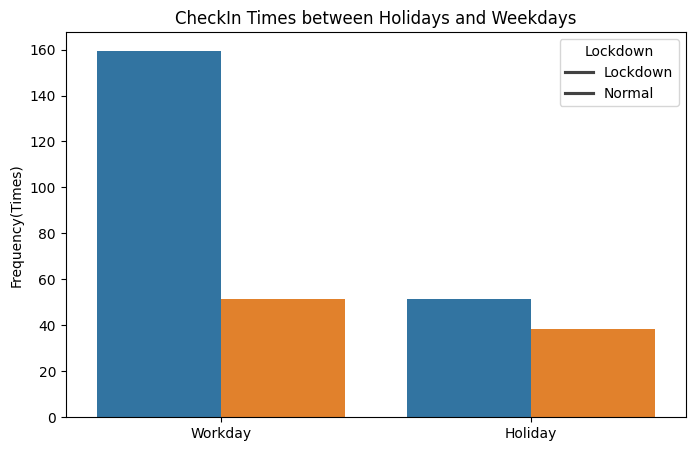

In [ ]:
#plot
plt.figure(figsize=(8,5))
day = sns.barplot(data = numAllDay, x="holiday", y="Normalized", hue="Lockdown")
day.set_title("CheckIn Times between Holidays and Weekdays")
day.set_xlabel("")
day.set_ylabel("Frequency(Times)")
day.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])

dayType = ["Workday", "Holiday"]
day.set_xticklabels(dayType)


plt.show()

### Used Times during Exam Period

In [ ]:
#check in time during exam
def getExam(datetime):
    date = datetime.date()
    return calendar.loc[date, "Exam"]

In [ ]:
checkinDF["Exam"] = checkinDF["Checkin Time"].apply(getExam)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season,Holiday,Covid,Exam
0,168236,Medewerker RUG/Hanze,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer,Summer Vacation,0.0,0.0


In [ ]:
#normalized exam and normal school day
numExam = checkinDF[checkinDF["Holiday"].isna()].groupby(["Covid", "Exam"]).size().reset_index(name = "Frequency")
display(numExam)

,Covid,Exam,Frequency
0,0.0,0.0,249680
1,0.0,1.0,72596
2,1.0,0.0,18190
3,1.0,1.0,8111


In [ ]:
numCalExam = calendar[calendar["holiday"].isna()].groupby(["Lockdown", "Exam"]).size().reset_index(name = "Frequency")
display(numCalExam)

,Lockdown,Exam,Frequency
0,0.0,0.0,1497
1,0.0,1.0,523
2,1.0,0.0,349
3,1.0,1.0,161


In [ ]:
numAllExam = numCalExam.merge(numExam, how = "left",\
                                  left_on = ["Lockdown", "Exam"], right_on = ["Covid", "Exam"],\
                                    suffixes = ["_hol", "_check"])

numAllExam["Normalized"] = numAllExam["Frequency_check"] / numAllExam["Frequency_hol"]
display(numAllExam)

,Lockdown,Exam,Frequency_hol,Covid,Frequency_check,Normalized
0,0.0,0.0,1497,0.0,249680,166.786907
1,0.0,1.0,523,0.0,72596,138.806883
2,1.0,0.0,349,1.0,18190,52.120344
3,1.0,1.0,161,1.0,8111,50.378882


/var/folders/sh/ktcqk1z52ml2yjmkfc25ck900000gn/T/ipykernel_79170/1818671610.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  exam.set_xticklabels(examType)


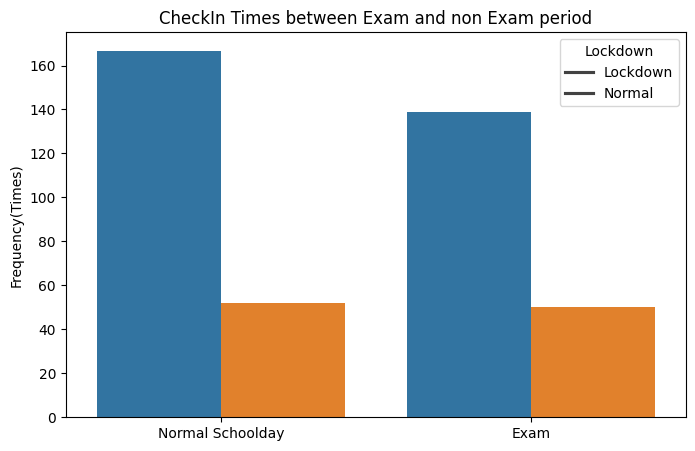

In [ ]:
#plot
plt.figure(figsize=(8,5))
exam = sns.barplot(data = numAllExam, x="Exam", y="Normalized", hue="Lockdown")
exam.set_title("CheckIn Times between Exam and non Exam period")
exam.set_xlabel("")
exam.set_ylabel("Frequency(Times)")
exam.legend(title = "Lockdown", labels = ["Lockdown", "Normal"])

examType = ["Normal Schoolday", "Exam"]
exam.set_xticklabels(examType)


plt.show()

### Used Times by Weather

In [ ]:
#load the weather data

## DAG

### Indentifying Relationship

In [ ]:
# Initialize a directed graph
dag = nx.DiGraph()

# Add nodes (features)
features = ["Gender", "Education Institute", "Date", "Season", "Month", "Weekday", "Holiday", "Exam", "Covid", "numFitness"]
dag.add_nodes_from(features)

# Define the relationships between features (edges)
edges = [
    ("Gender", "numFitness"),
    ("Education Institute", "numFitness"),
    ("Card Type", "numFitness"),
    ("Season", "numFitness"),
    ("Month", "numFitness"),
    ("Weekday", "numFitness"),
    ("Holiday", "numFitness"),
    ("Exam", "numFitness"),
    ("Covid", "numFitness"),
    ("Covid", "Holiday"),
    ("Covid", "Exam"),
    ("Date", "Month"),
    ("Month", "Season"),
    ("Date", "Season"),
    ("Date", "Weekday"),
    ("Date", "Holiday"),
    ("Date", "Exam"),
]

dag.add_edges_from(edges)

### Create Graph

In [ ]:
# Visualize the DAG
#plt.figure(figsize=(10, 8))
#pos = nx.spring_layout(dag, iterations=1000)  # Position nodes using Fruchterman-Reingold force-directed algorithm
#nx.draw_networkx(dag, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=8, font_weight='bold', edge_color='black')
#plt.title("DAG Representing Relationships Between Features", fontsize=20)

#plt.show()

# Model

## Create Input Dataset

In [ ]:
#create input dataset
checkinbyDate = checkinDF.groupby(checkinDF["Checkin Time"].dt.date).size().reset_index(name = "Frequency")
byDateDF = checkinbyDate.sort_values("Checkin Time")
display(byDateDF)

,Checkin Time,Frequency
0,2017-08-01,180
1,2017-08-02,146
2,2017-08-03,155
3,2017-08-04,164
4,2017-08-07,192
...,...,...
1260,2021-11-27,183
1261,2021-11-28,152
1262,2021-11-29,184
1263,2021-11-30,195


In [ ]:
print(type(byDateDF["Checkin Time"][0]))

<class 'datetime.date'>


In [ ]:
datetimes = pd.to_datetime(byDateDF["Checkin Time"][0])
print(type(byDateDF["Checkin Time"][0]))

<class 'datetime.date'>


In [ ]:
def getSeasonInt(dates):
    month = dates.month
    if month in (12, 1, 2):
        return "Winter"
    elif month in (3, 4, 5):
        return "Spring"
    elif month in (6, 7, 8):
        return "Summer"
    else:
        return "Fall"

In [ ]:
byDateDF["Season"] = byDateDF["Checkin Time"].apply(getSeasonInt)

byDateDF.head(10)

,Checkin Time,Frequency,Season
0,2017-08-01,180,Summer
1,2017-08-02,146,Summer
2,2017-08-03,155,Summer
3,2017-08-04,164,Summer
4,2017-08-07,192,Summer
5,2017-08-08,150,Summer
6,2017-08-09,162,Summer
7,2017-08-10,154,Summer
8,2017-08-11,157,Summer
9,2017-08-14,226,Summer


In [ ]:
calendar.index = pd.to_datetime(calendar.index).date
calendarDF = calendar[calendar.index > pd.to_datetime("2017-07-31").date()]
display(calendarDF.head(20))

,holiday,Exam,Lockdown
2017-08-01,Summer Vacation,0.0,0.0
2017-08-02,Summer Vacation,0.0,0.0
2017-08-03,Summer Vacation,0.0,0.0
2017-08-04,Summer Vacation,0.0,0.0
2017-08-05,Summer Vacation,0.0,0.0
2017-08-06,Summer Vacation,0.0,0.0
2017-08-07,Summer Vacation,0.0,0.0
2017-08-08,Summer Vacation,0.0,0.0
2017-08-09,Summer Vacation,0.0,0.0
2017-08-10,Summer Vacation,0.0,0.0


In [ ]:
temp_inputDF = byDateDF.merge(calendarDF, how = "right", left_on="Checkin Time", right_on=calendarDF.index)
temp_inputDF.head(20)

,Checkin Time,Frequency,Season,holiday,Exam,Lockdown
0,2017-08-01,180.0,Summer,Summer Vacation,0.0,0.0
1,2017-08-02,146.0,Summer,Summer Vacation,0.0,0.0
2,2017-08-03,155.0,Summer,Summer Vacation,0.0,0.0
3,2017-08-04,164.0,Summer,Summer Vacation,0.0,0.0
4,2017-08-05,NaN,NaN,Summer Vacation,0.0,0.0
5,2017-08-06,NaN,NaN,Summer Vacation,0.0,0.0
6,2017-08-07,192.0,Summer,Summer Vacation,0.0,0.0
7,2017-08-08,150.0,Summer,Summer Vacation,0.0,0.0
8,2017-08-09,162.0,Summer,Summer Vacation,0.0,0.0
9,2017-08-10,154.0,Summer,Summer Vacation,0.0,0.0


In [ ]:
numSchool = checkinDF.groupby([checkinDF["Checkin Time"].dt.date, "Institution"]).size().reset_index(name = "Num")
print(numSchool[numSchool["Num"] < 1])

Empty DataFrame
Columns: [Checkin Time, Institution, Num]
Index: []


In [ ]:
numSchool = checkinDF.groupby([checkinDF["Checkin Time"].dt.date, "Institution"]).size().unstack(fill_value=0)

# Convert counts to boolean (True if > 0, else False)
numSchool = numSchool > 0

# Reset index to keep date as a column
numSchool = numSchool.reset_index()

print(numSchool)


Institution Checkin Time  Hanze  Medewerker RUG/Hanze   RUG
0             2017-08-01   True                  True  True
1             2017-08-02   True                  True  True
2             2017-08-03   True                  True  True
3             2017-08-04   True                  True  True
4             2017-08-07   True                  True  True
...                  ...    ...                   ...   ...
1260          2021-11-27   True                  True  True
1261          2021-11-28   True                  True  True
1262          2021-11-29   True                  True  True
1263          2021-11-30   True                  True  True
1264          2021-12-01   True                  True  True

[1265 rows x 4 columns]


In [ ]:
inputDF = numSchool.merge(temp_inputDF, how = "right", on="Checkin Time")
inputDF.head(20)

,Checkin Time,Hanze,Medewerker RUG/Hanze,RUG,Frequency,Season,holiday,Exam,Lockdown
0,2017-08-01,True,True,True,180.0,Summer,Summer Vacation,0.0,0.0
1,2017-08-02,True,True,True,146.0,Summer,Summer Vacation,0.0,0.0
2,2017-08-03,True,True,True,155.0,Summer,Summer Vacation,0.0,0.0
3,2017-08-04,True,True,True,164.0,Summer,Summer Vacation,0.0,0.0
4,2017-08-05,NaN,NaN,NaN,NaN,NaN,Summer Vacation,0.0,0.0
5,2017-08-06,NaN,NaN,NaN,NaN,NaN,Summer Vacation,0.0,0.0
6,2017-08-07,True,True,True,192.0,Summer,Summer Vacation,0.0,0.0
7,2017-08-08,True,True,True,150.0,Summer,Summer Vacation,0.0,0.0
8,2017-08-09,True,True,True,162.0,Summer,Summer Vacation,0.0,0.0
9,2017-08-10,True,True,True,154.0,Summer,Summer Vacation,0.0,0.0


In [ ]:
inputDF["Day Name"] = pd.to_datetime(inputDF["Checkin Time"]).dt.day_name()
inputDF.head(20)

,Checkin Time,Hanze,Medewerker RUG/Hanze,RUG,Frequency,Season,holiday,Exam,Lockdown,Day Name
0,2017-08-01,True,True,True,180.0,Summer,Summer Vacation,0.0,0.0,Tuesday
1,2017-08-02,True,True,True,146.0,Summer,Summer Vacation,0.0,0.0,Wednesday
2,2017-08-03,True,True,True,155.0,Summer,Summer Vacation,0.0,0.0,Thursday
3,2017-08-04,True,True,True,164.0,Summer,Summer Vacation,0.0,0.0,Friday
4,2017-08-05,NaN,NaN,NaN,NaN,NaN,Summer Vacation,0.0,0.0,Saturday
5,2017-08-06,NaN,NaN,NaN,NaN,NaN,Summer Vacation,0.0,0.0,Sunday
6,2017-08-07,True,True,True,192.0,Summer,Summer Vacation,0.0,0.0,Monday
7,2017-08-08,True,True,True,150.0,Summer,Summer Vacation,0.0,0.0,Tuesday
8,2017-08-09,True,True,True,162.0,Summer,Summer Vacation,0.0,0.0,Wednesday
9,2017-08-10,True,True,True,154.0,Summer,Summer Vacation,0.0,0.0,Thursday


In [257]:
numGender = checkinDF.groupby([pd.to_datetime(checkinDF["Checkin Time"]).dt.date, "Gender"]).size().unstack(fill_value=0)

# Convert counts to boolean (True if > 0, else False)
numGender = numGender > 0

# Reset index to keep date as a column
numGender = numGender.reset_index()

print(numGender)

Gender Checkin Time     M     V
0        2017-08-01  True  True
1        2017-08-02  True  True
2        2017-08-03  True  True
3        2017-08-04  True  True
4        2017-08-07  True  True
...             ...   ...   ...
1260     2021-11-27  True  True
1261     2021-11-28  True  True
1262     2021-11-29  True  True
1263     2021-11-30  True  True
1264     2021-12-01  True  True

[1265 rows x 3 columns]


In [258]:
inputDF = numGender.merge(inputDF, how = "right", on="Checkin Time")
inputDF.head(20)

,Checkin Time,M,V,Hanze,Medewerker RUG/Hanze,RUG,Frequency,Season,holiday,Exam,Lockdown,Day Name
0,2017-08-01,True,True,True,True,True,180.0,Summer,Summer Vacation,0.0,0.0,Tuesday
1,2017-08-02,True,True,True,True,True,146.0,Summer,Summer Vacation,0.0,0.0,Wednesday
2,2017-08-03,True,True,True,True,True,155.0,Summer,Summer Vacation,0.0,0.0,Thursday
3,2017-08-04,True,True,True,True,True,164.0,Summer,Summer Vacation,0.0,0.0,Friday
4,2017-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer Vacation,0.0,0.0,Saturday
5,2017-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer Vacation,0.0,0.0,Sunday
6,2017-08-07,True,True,True,True,True,192.0,Summer,Summer Vacation,0.0,0.0,Monday
7,2017-08-08,True,True,True,True,True,150.0,Summer,Summer Vacation,0.0,0.0,Tuesday
8,2017-08-09,True,True,True,True,True,162.0,Summer,Summer Vacation,0.0,0.0,Wednesday
9,2017-08-10,True,True,True,True,True,154.0,Summer,Summer Vacation,0.0,0.0,Thursday


In [262]:
from sklearn.preprocessing import LabelEncoder
encoded_classes = []
encoder = LabelEncoder()

column = ['Checkin Time', 'M', 'V', 'Hanze', 'Medewerker RUG/Hanze', 'RUG', 'Frequency', 'Season', 'holiday', 'Exam', 'Lockdown', 'Day Name']

for col in column:
    inputDF[col] = encoder.fit_transform(inputDF[col])
    encoded_classes.append(encoder.classes_)

inputDF.head(20)

,Checkin Time,M,V,Hanze,Medewerker RUG/Hanze,RUG,Frequency,Season,holiday,Exam,Lockdown,Day Name
0,0,1,1,1,1,0,149,2,6,0,0,5
1,1,1,1,1,1,0,116,2,6,0,0,6
2,2,1,1,1,1,0,125,2,6,0,0,4
3,3,1,1,1,1,0,134,2,6,0,0,0
4,4,2,2,2,2,1,553,4,6,0,0,2
5,5,2,2,2,2,1,553,4,6,0,0,3
6,6,1,1,1,1,0,161,2,6,0,0,1
7,7,1,1,1,1,0,120,2,6,0,0,5
8,8,1,1,1,1,0,132,2,6,0,0,6
9,9,1,1,1,1,0,124,2,6,0,0,4


In [269]:
Y = inputDF["Frequency"]
X = inputDF.drop(columns=['Frequency'], axis=1)

In [271]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [273]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [277]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.5,0.5,0.5,0.5,0.0,0.5,0.75,0.0,0.0,0.833333
1,0.000342,0.5,0.5,0.5,0.5,0.0,0.5,0.75,0.0,0.0,1.000000
2,0.000685,0.5,0.5,0.5,0.5,0.0,0.5,0.75,0.0,0.0,0.666667
3,0.001027,0.5,0.5,0.5,0.5,0.0,0.5,0.75,0.0,0.0,0.000000
4,0.001369,1.0,1.0,1.0,1.0,1.0,1.0,0.75,0.0,0.0,0.333333


In [276]:
Y.head()

,0
0,0.269439
1,0.209765
2,0.226040
3,0.242315
4,1.000000


# Logistic Regression

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [280]:
# initialized the train data (drop the unused data) and test/target data
train = inputDF.drop(['Frequency'],axis = 1)
test = inputDF['Frequency']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

/Users/nadineaulyaa/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5860889395667047
Confusion Matrix:
[[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   2]
 [  0   0   0 ...   0   0   1]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0 514]]


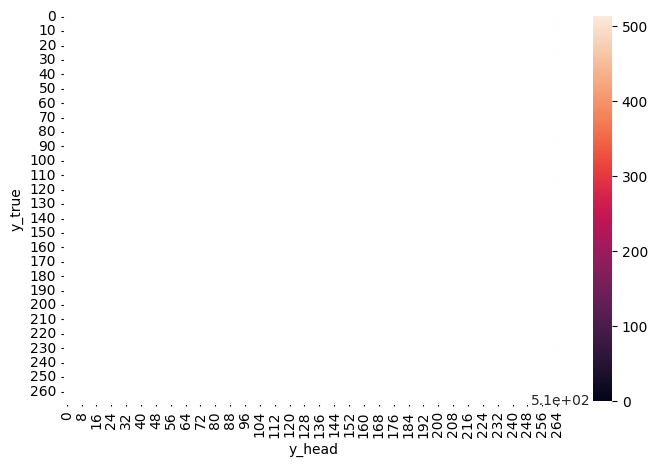

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
    

/Users/nadineaulyaa/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nadineaulyaa/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nadineaulyaa/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [282]:
logModel = LogisticRegression(max_iter=200)
logModel.fit(X_train, y_train)

# predict the target value using the train data
y_pred = logModel.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()
print('Classification Report:')
print(classification_report(y_test, y_pred))

In [284]:
#Evaluate model
def print_model_score(model_name, data_name, pred, target):
  print(model_name)
  print(data_name)
  print(classification_report(target,pred))
  print('acc = ',accuracy_score(target,pred))
  print('auc = ',roc_auc_score(target,pred))
  print('\n','-'*30,'\n')

In [285]:
#Train
lr_smote = LogisticRegression(C=10, class_weight='balanced')
lr_smote.fit(X_train, y_train)
#Test
pred_lr_smote_test = lr_smote.predict(X_test)
print_model_score('Logistic Regression (trained with SMOTE)', 'test data', pred_lr_smote_test, y_test)


Logistic Regression (trained with SMOTE)
test data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          32       0.00      0

/Users/nadineaulyaa/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nadineaulyaa/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nadineaulyaa/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarn

ValueError: multi_class must be in ('ovo', 'ovr')

# Linear Regression

# Random Forest

# XG Boost

# SVR

# Poisson Regression

# Decision Tree

# RNN